In [ ]:
#Dependancies
import requests
import pandas as pd
import json
from config import college_scorecard_api_key
from pandas_profiling import ProfileReport
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats


import matplotlib.pyplot as plt
import os

In [ ]:
# Call in 2017 'College Scorecard (i.e. csc)' API ; only schools that offer a bachelor's or graduate degree
year = "2017"
csc_url = "https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.highest=3,4&"

csc_2017_query_url = f'{csc_url}api_key={college_scorecard_api_key}&_fields=id,school.name,school.city,school.state_fips,school.zip,location.lat,location.lon,{year}'
csc_2017_response = requests.get(csc_2017_query_url).json()

# Identify JSON page number
page_num = csc_2017_response['metadata']['page']
csc_json_data = []

# Loop through each JSON page and extract JSON data into a list
for page in range(0, 29):
    csc_2017_response = requests.get(csc_2017_query_url, params={'page': page, 'per_page': 100}).json()
    csc_json_data.append(csc_2017_response['results'])
    csc_data_list = []
    for csc_data in csc_json_data:
        for csc_objects in csc_data:
            csc_data_list.append(csc_objects)

# Convert JSON list into a Dataframe
csc_data_frame = pd.DataFrame(csc_data_list)

In [ ]:
# Pull columns needed
csc_data_table_pull = csc_data_frame[['school.name',
                                     'school.city',
                                     'school.state_fips',
                                     'location.lat',
                                     'location.lon',
                                     '2017.student.size',
                                     '2017.cost.attendance.academic_year',
                                     '2017.cost.tuition.in_state',
                                     '2017.cost.tuition.out_of_state',
                                     '2017.student.retention_rate.four_year.full_time',
                                     '2017.aid.federal_loan_rate',
                                     '2017.aid.loan_principal',
                                     '2017.aid.median_debt.completers.overall',
                                     '2017.aid.median_debt.income.0_30000',
                                     '2017.aid.median_debt.income.30001_75000',
                                     '2017.aid.median_debt.income.greater_than_75000',
                                     '2017.aid.median_debt.female_students',
                                     '2017.aid.median_debt.male_students',
                                     '2017.completion.rate_suppressed.overall']].dropna().reset_index(drop=True)

# Clean column headers
csc_data_table_header_clean = csc_data_table_pull.rename(columns = {'school.name': 'School Name',
                                                              'school.city': 'City',
                                                              'school.state_fips': 'State Code',
                                                              'location.lat': 'Latitude',
                                                              'location.lon': 'Longitude',
                                                              '2017.student.size': 'Student Size',
                                                              '2017.cost.attendance.academic_year': 'Cost of Attendance',
                                                              '2017.cost.tuition.in_state': 'In-State Tuition',
                                                              '2017.cost.tuition.out_of_state': 'Out-of-State Tuition',
                                                              '2017.student.retention_rate.four_year.full_time': 'Retention Rate: Fulltime Student',
                                                              '2017.aid.federal_loan_rate': '% of Undergrad Students Recieving Fed Student Loan',
                                                              '2017.aid.loan_principal': 'Median Loan Principal',
                                                              '2017.aid.median_debt.completers.overall': 'Median Debt',
                                                              '2017.aid.median_debt.income.0_30000': 'Median Debt with income between 0-30k',
                                                              '2017.aid.median_debt.income.30001_75000': 'Median Debt with income between 30,001-75k',
                                                              '2017.aid.median_debt.income.greater_than_75000': 'Median Debt with income greater than 75k',
                                                              '2017.aid.median_debt.female_students': 'Median Debt for Female Students',
                                                              '2017.aid.median_debt.male_students': 'Median Debt for Male Students',
                                                              '2017.completion.rate_suppressed.overall': 'Completion Rate'})


In [4]:
# Pull in and merge State names.

fips_path = "Resources/State FIPS Codes.csv"
fips_states_df = pd.read_csv(fips_path)

csc_data_final = pd.merge(csc_data_table_header_clean, fips_states_df, on='State Code')

### Henock's Code - Start

In [5]:
#csc_data_final.corr(method = 'pearson')

### Henock's Code - End

----------------------------------------------

### JJ's Code - Start

### JJ's Code - End

----------------------------------------------

### Ana's Code - Start

### Ana's Code - End

----------------------------------------------

### Vikash's Code - Start

In [6]:
profile = ProfileReport(csc_data_final, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [7]:
profile.to_notebook_iframe()

In [8]:
loanDF = csc_data_final

In [9]:
# find list of columns which has more than 50% of data missing.
def findMissingValueCols(df):
    #df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()
    missingValueColumns = []
    for column in df.columns:
        nullRows = df.where(col(column).isNull()).count()
        print(column, "--", nullRows)
        if nullRows > loanDFRows*0.5 : # i.e. if ALL values are NULL
            missingValueColumns.append(column)
    return missingValueColumns

# columns names which has more than 50% data missing
#missingValueColList = findMissingValueCols(loanDF)

#print(missingValueColList)

In [10]:
loanCoA = loanDF[["Cost_of_Attendance"]].astype('float')
loanCoA.head()

Cost_of_Attendance
0             42994.0
1             24903.0
2             37257.0
3             24725.0
4             20940.0

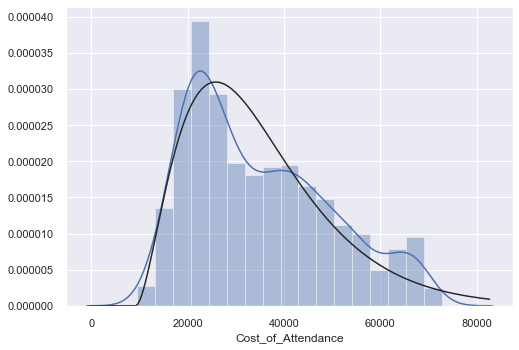

In [11]:
loanCoA = loanDF[["Cost_of_Attendance"]].astype('float')
sns.distplot(loanCoA, fit=stats.gamma, axlabel="Cost_of_Attendance", label="Cost_of_Attendance distribution")

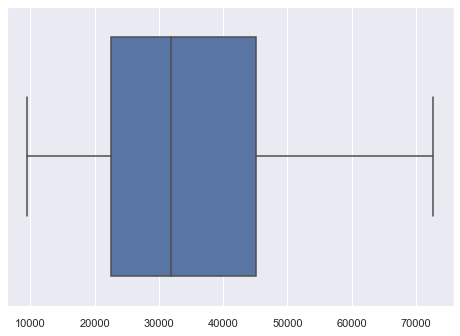

In [12]:
sns.boxplot(loanCoA)

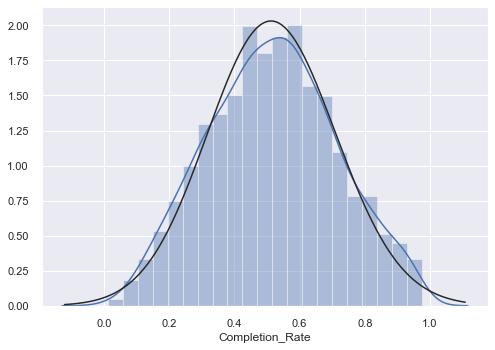

In [13]:
loanCR = loanDF[["Completion_Rate"]].astype('float')
sns.distplot(loanCR, fit=stats.gamma, axlabel="Completion_Rate", label="Completion_Rate distribution")

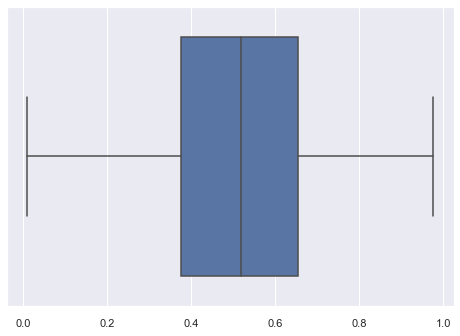

In [14]:
sns.boxplot(loanCR)

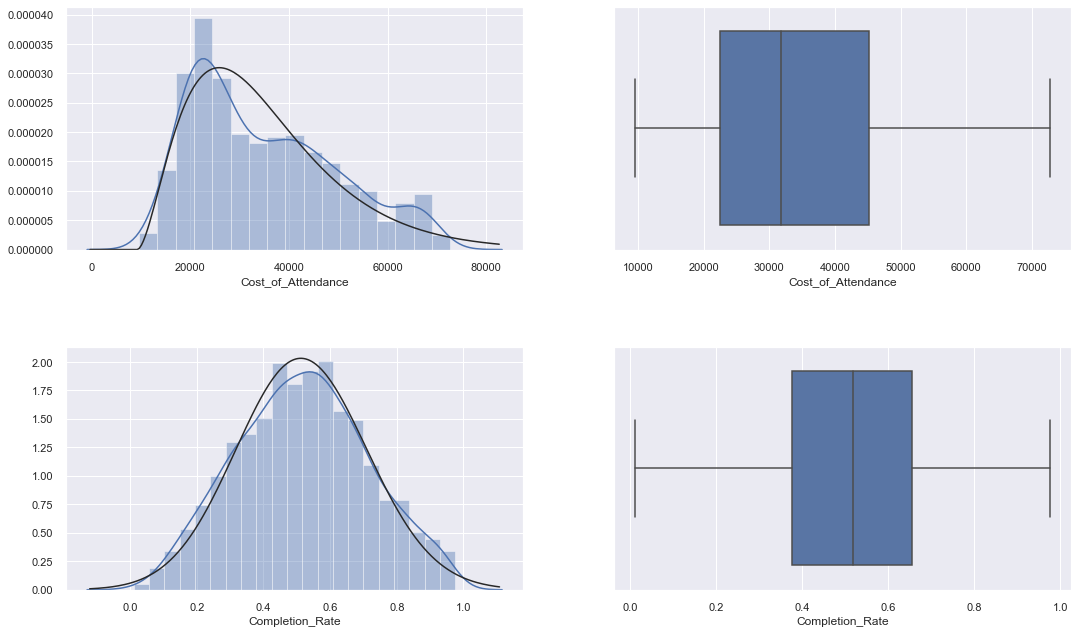

In [29]:
fig, ax =plt.subplots(2,2, figsize=(18,12))
plt.subplots_adjust(hspace = 0.4, top = 0.8)
# Cost_of_Attendance distribution plots
sns.distplot(loanCoA, fit=stats.gamma, axlabel="Cost_of_Attendance", label="Cost_of_Attendance distribution", ax=ax[0][0])
sns.boxplot(x=loanCoA.Cost_of_Attendance, ax=ax[0][1])

# Completion_Rate distribution plots
sns.distplot(loanCR, fit=stats.gamma, axlabel="Completion_Rate", label="Completion_Rate distribution", ax=ax[1][0])
sns.boxplot(x=loanCR.Completion_Rate, ax=ax[1][1])

fig.show()


In [40]:
from scipy import stats

The r-squared is: 0.8357334423680656


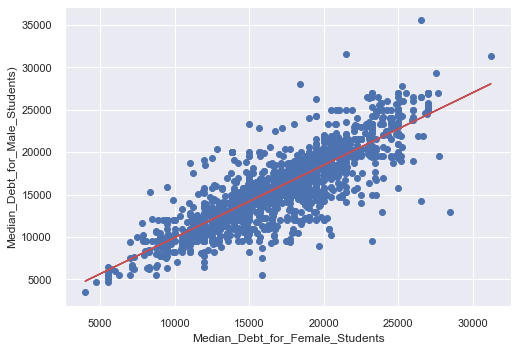

In [50]:
x_values = csc_data_final["Median_Debt_for_Female_Students"]
y_values = csc_data_final['Median_Debt_for_Male_Students']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Median_Debt_for_Female_Students')
plt.ylabel('Median_Debt_for_Male_Students)')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.6018209600689016


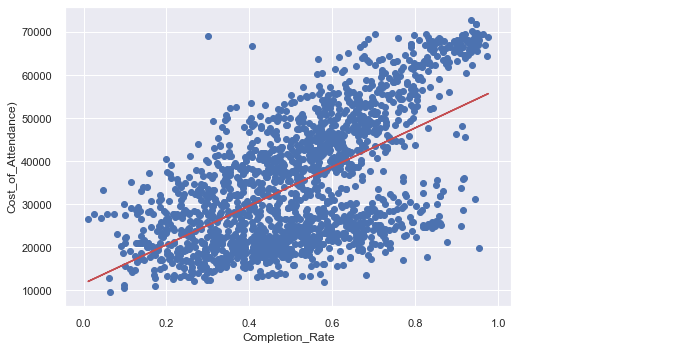

In [62]:
x_values = csc_data_final["Completion_Rate"]
y_values = csc_data_final['Cost_of_Attendance']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.xlabel('Completion_Rate')
plt.ylabel('Cost_of_Attendance)')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.9816713138974054


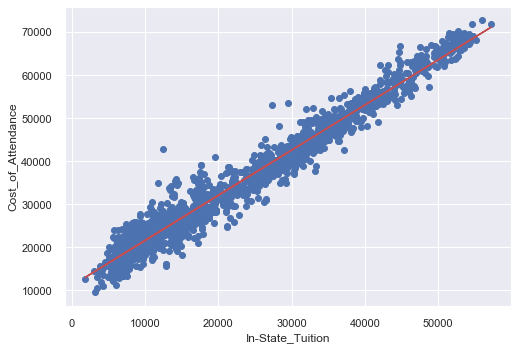

In [64]:
x_values = csc_data_final["In-State_Tuition"]
y_values = csc_data_final['Cost_of_Attendance']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.xlabel('In-State_Tuition')
plt.ylabel('Cost_of_Attendance')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.9035958862000951


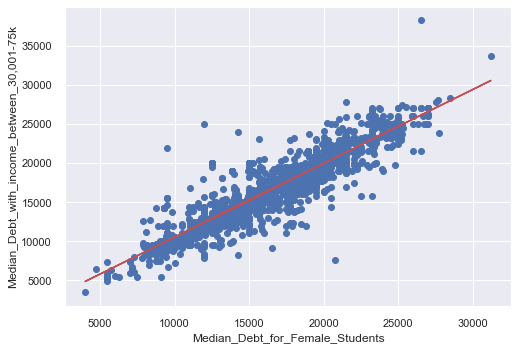

In [66]:
x_values = csc_data_final["Median_Debt_for_Female_Students"]
y_values = csc_data_final['Median_Debt_with_income_between_30,001-75k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,20),fontsize=15,color="red")
plt.xlabel('Median_Debt_for_Female_Students')
plt.ylabel('Median_Debt_with_income_between_30,001-75k')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.9088113615864829


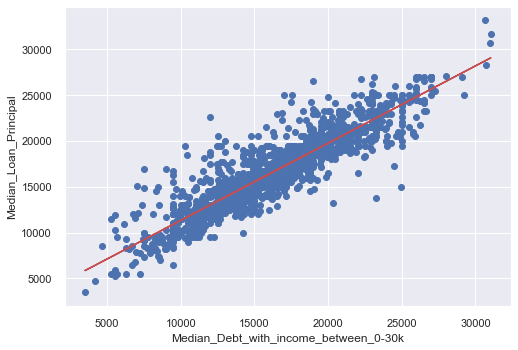

In [68]:
x_values = csc_data_final["Median_Debt_with_income_between_0-30k"]
y_values = csc_data_final['Median_Loan_Principal']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,20),fontsize=15,color="red")
plt.xlabel('Median_Debt_with_income_between_0-30k')
plt.ylabel('Median_Loan_Principal')
print(f"The r-squared is: {rvalue}")
plt.show()

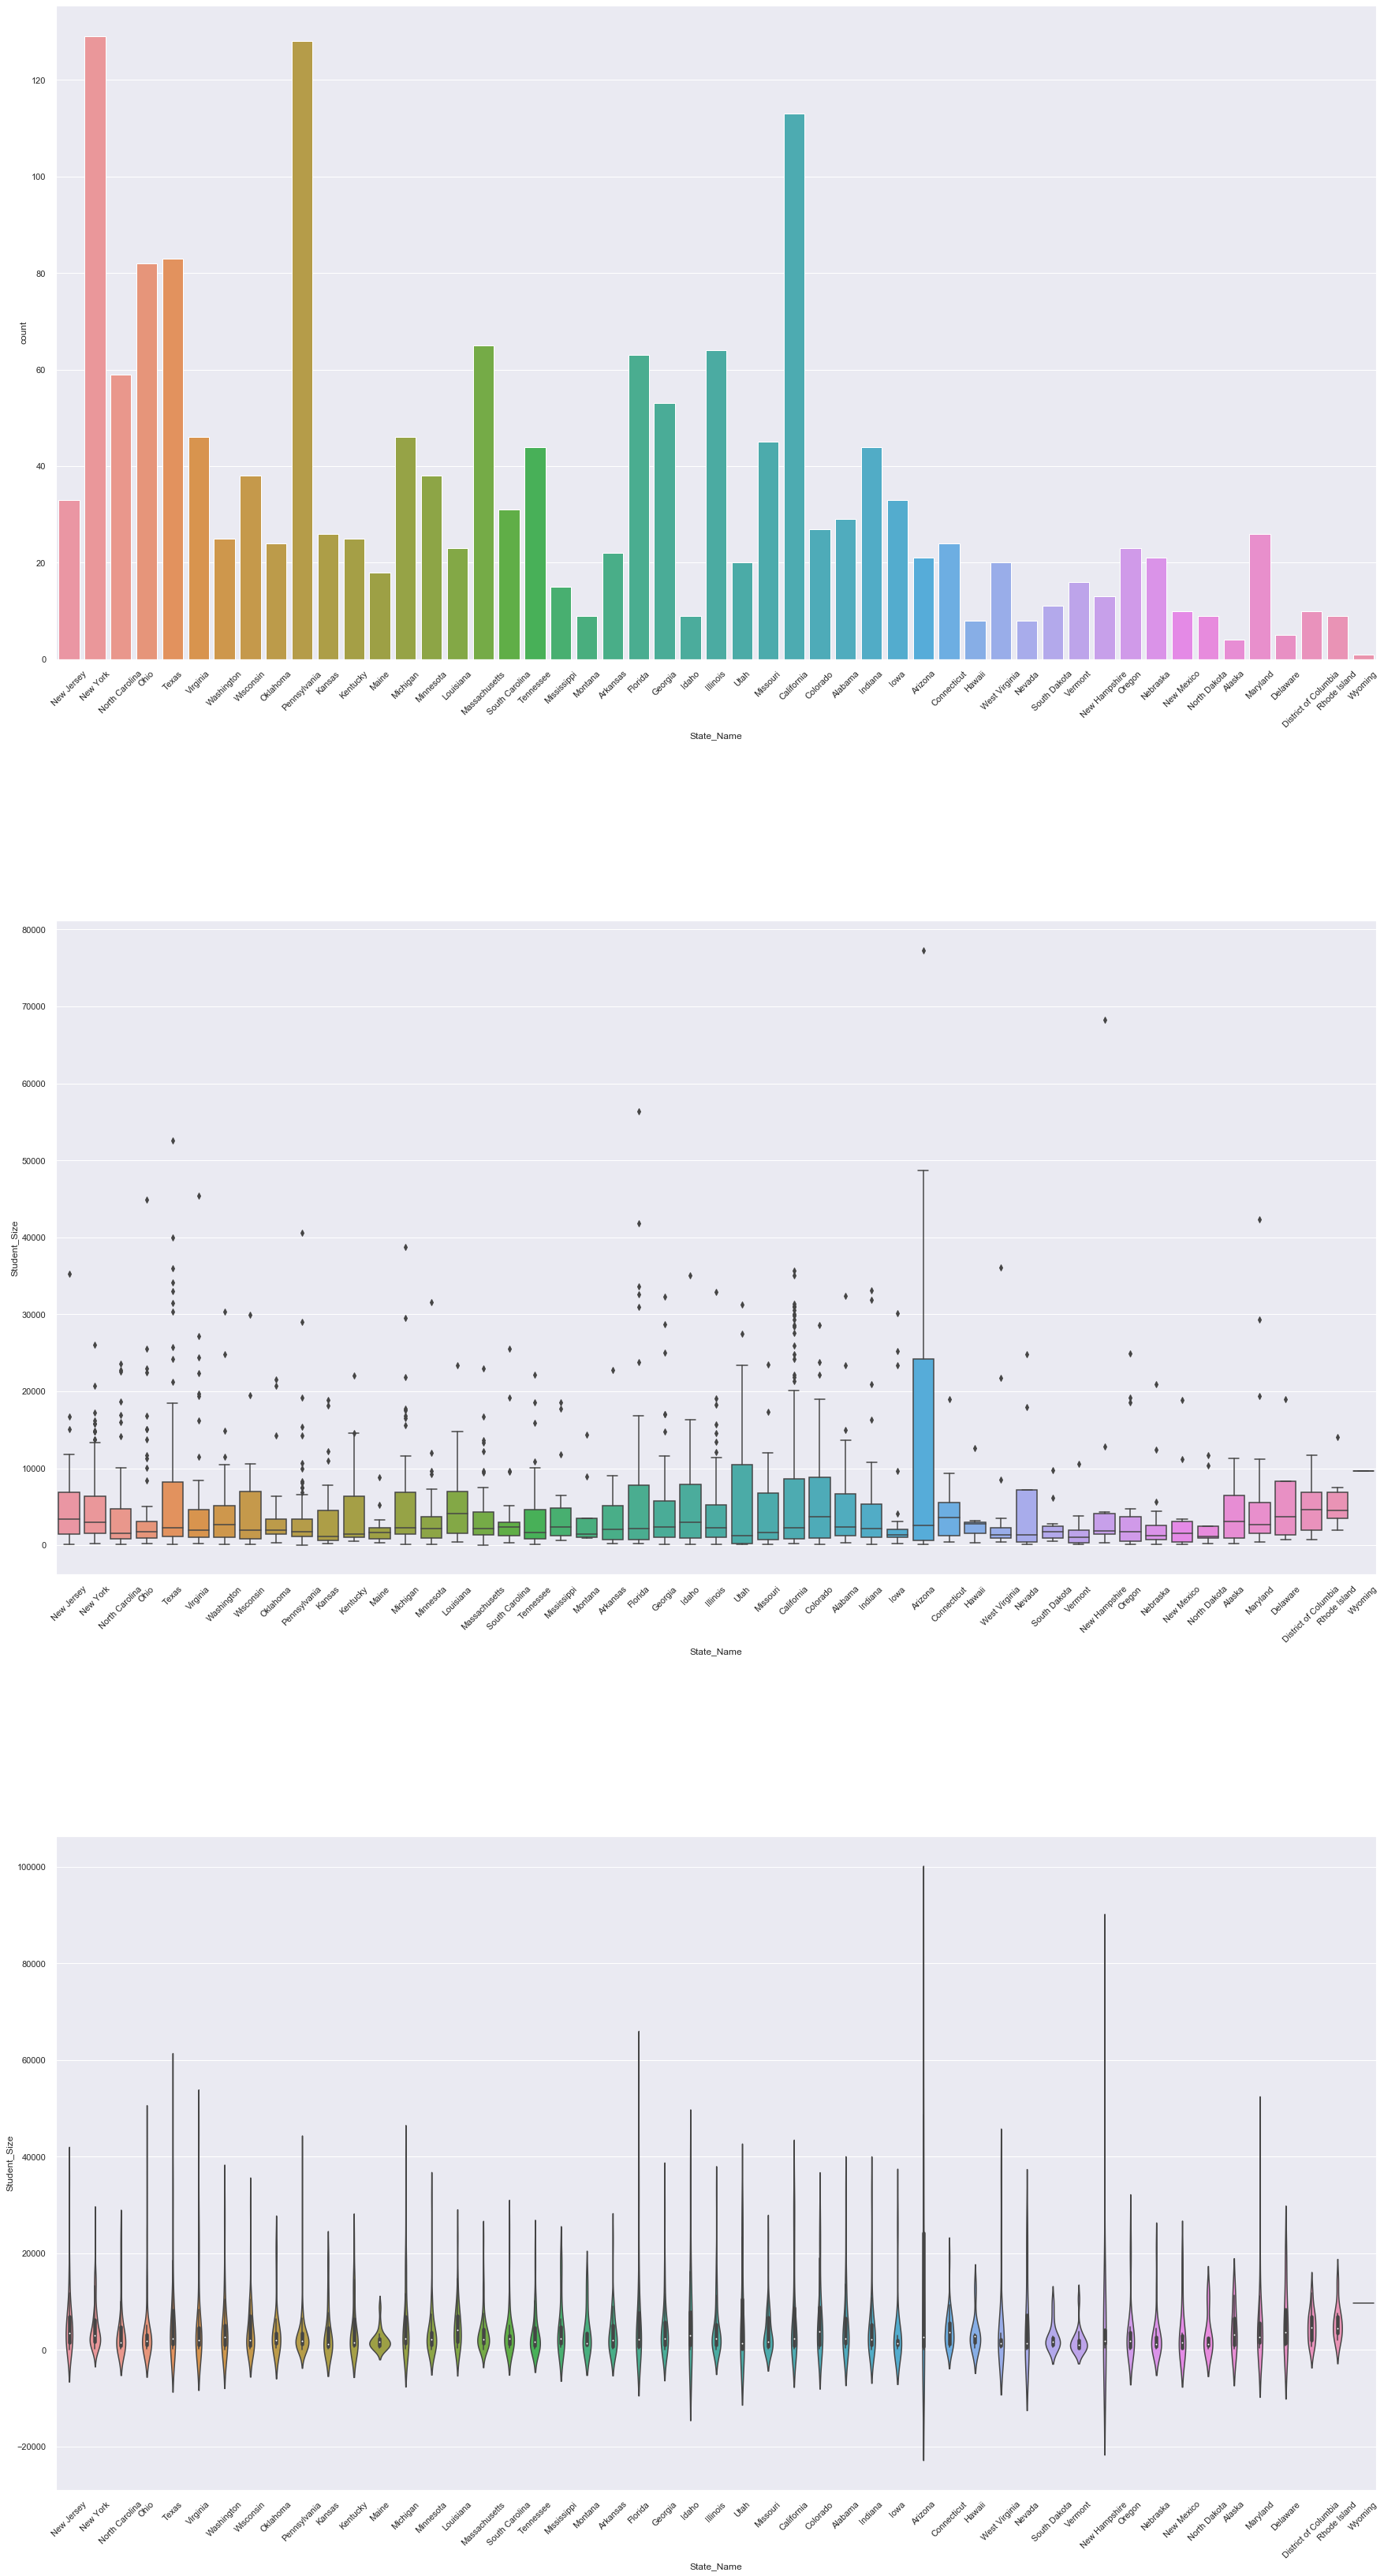

In [100]:
dd = csc_data_final[["State_Name", "Student_Size"]]
fig, ax =plt.subplots(3,1,figsize=(30,50))
plt.subplots_adjust(hspace = 0.4, top = 1.0)

s0 = sns.countplot(x="State_Name", data=dd,ax=ax[0])
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

s1 = sns.boxplot(x="State_Name", y="Student_Size", data=dd,ax=ax[1])
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

s2 = sns.violinplot(x="State_Name", y="Student_Size", data=dd,ax=ax[2] , estimator=sum)
s2.set_xticklabels(s2.get_xticklabels(),rotation=45)
plt.show()

In [101]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

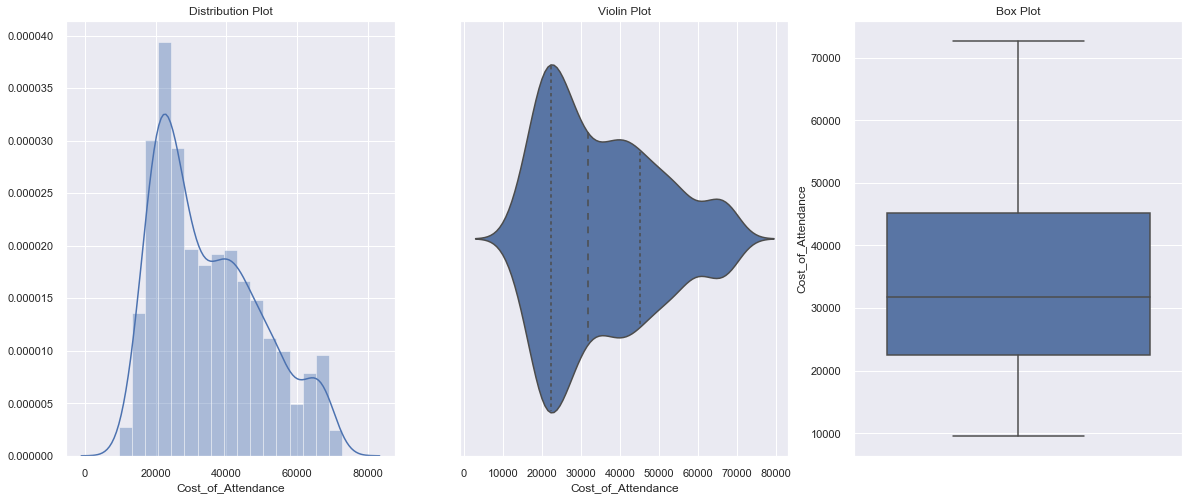

In [102]:
univariate(df=csc_data_final,col='Cost_of_Attendance',vartype=0)

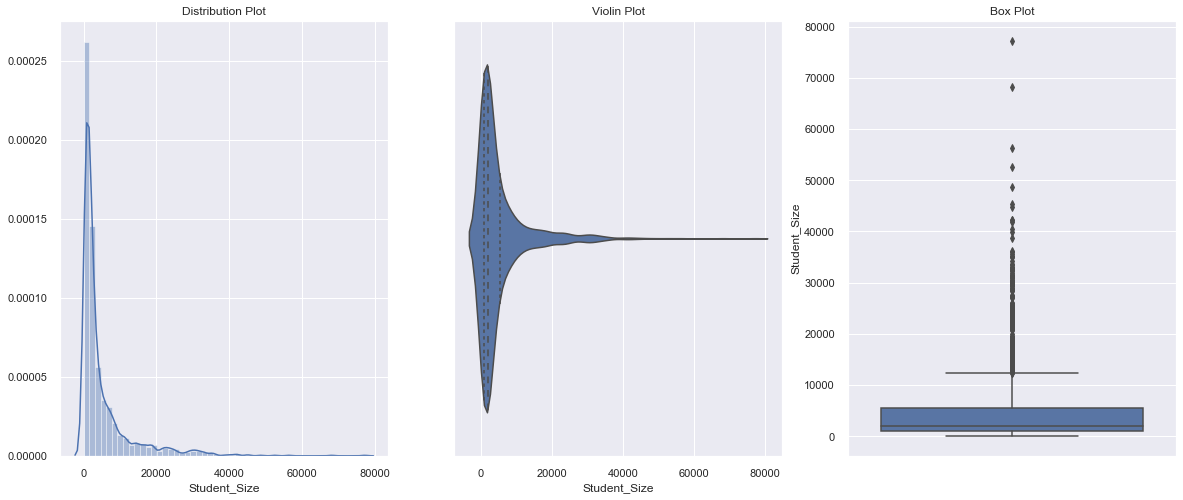

In [106]:
univariate(df=csc_data_final,col='Student_Size',vartype=0)

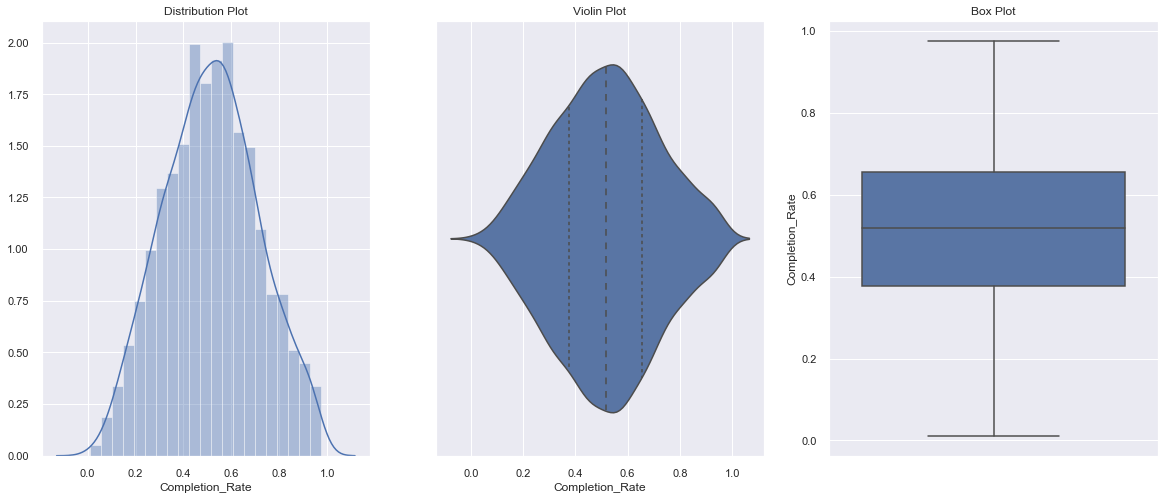

In [107]:
univariate(df=csc_data_final,col='Completion_Rate',vartype=0)

In [119]:
loan_data = csc_data_final[["Cost_of_Attendance", "In-State_Tuition", "Completion_Rate", "Median_Debt_for_Female_Students" , "Median_Debt_with_income_between_30,001-75k", "Median_Loan_Principal", "Median_Debt_for_Male_Students", "Median_Debt_with_income_between_0-30k"]]
loan_data.head()

Cost_of_Attendance  In-State_Tuition  Completion_Rate  \
0             42994.0           29300.0           0.3155   
1             24903.0           21225.0           0.8467   
2             37257.0           21076.0           0.1579   
3             24725.0           21225.0           0.8188   
4             20940.0            9960.0           0.1260   

   Median_Debt_for_Female_Students  \
0                          18500.0   
1                          13175.0   
2                          15250.0   
3                          13175.0   
4                          18917.0   

   Median_Debt_with_income_between_30,001-75k  Median_Loan_Principal  \
0                                     18113.0                17500.0   
1                                     18025.0                13925.0   
2                                     20030.0                15375.0   
3                                     18025.0                13925.0   
4                                     21593.0                18500.0   

   Median_Debt_for_Male_Students  Median_Debt_with_income_between_0-30k  
0                        16219.0                                18500.0  
1                        15800.0                                10539.0  
2                        15077.0                                14363.0  
3                        15800.0                                10539.0  
4                        16962.0                                16062.0

In [120]:
loan_correlation = loan_data.corr()
loan_correlation.head()

Cost_of_Attendance  \
Cost_of_Attendance                                    1.000000   
In-State_Tuition                                      0.981671   
Completion_Rate                                       0.601821   
Median_Debt_for_Female_Students                       0.466327   
Median_Debt_with_income_between_30,001-75k            0.424750   

                                            In-State_Tuition  Completion_Rate  \
Cost_of_Attendance                                  0.981671         0.601821   
In-State_Tuition                                    1.000000         0.578473   
Completion_Rate                                     0.578473         1.000000   
Median_Debt_for_Female_Students                     0.472787         0.380130   
Median_Debt_with_income_between_30,001-75k          0.429888         0.334161   

                                            Median_Debt_for_Female_Students  \
Cost_of_Attendance                                                 0.466327   
In-State_Tuition                                                   0.472787   
Completion_Rate                                                    0.380130   
Median_Debt_for_Female_Students                                    1.000000   
Median_Debt_with_income_between_30,001-75k                         0.903596   

                                            Median_Debt_with_income_between_30,001-75k  \
Cost_of_Attendance                                                            0.424750   
In-State_Tuition                                                              0.429888   
Completion_Rate                                                               0.334161   
Median_Debt_for_Female_Students                                               0.903596   
Median_Debt_with_income_between_30,001-75k                                    1.000000   

                                            Median_Loan_Principal  \
Cost_of_Attendance                                       0.482567   
In-State_Tuition                                         0.484703   
Completion_Rate                                          0.430165   
Median_Debt_for_Female_Students                          0.962878   
Median_Debt_with_income_between_30,001-75k               0.937604   

                                            Median_Debt_for_Male_Students  \
Cost_of_Attendance                                               0.477316   
In-State_Tuition                                                 0.472275   
Completion_Rate                                                  0.461209   
Median_Debt_for_Female_Students                                  0.835733   
Median_Debt_with_income_between_30,001-75k                       0.885571   

                                            Median_Debt_with_income_between_0-30k  
Cost_of_Attendance                                                       0.371236  
In-State_Tuition                                                         0.371229  
Completion_Rate                                                          0.319869  
Median_Debt_for_Female_Students                                          0.879073  
Median_Debt_with_income_between_30,001-75k                               0.829659

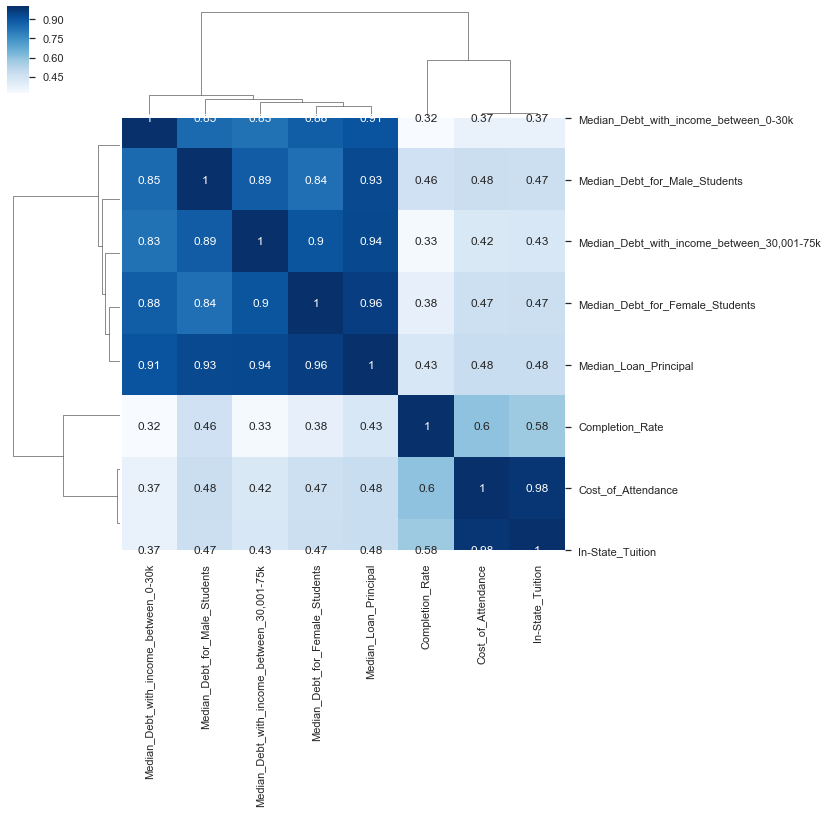

In [145]:
sns.clustermap(loan_correlation, cmap="Blues", 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True, robust=True)
plt.show()

### Vikash's Code - End